Import Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [4]:
train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('test_data.csv')

Drop the unnecessary column

In [5]:
if 'Unnamed: 0' in train_data.columns:
    train_data = train_data.drop(columns=['Unnamed: 0'])
if 'Unnamed: 0' in test_data.columns:
    test_data = test_data.drop(columns=['Unnamed: 0'])

Encode categorical features

In [6]:
categorical_features = ['protocol_type', 'service', 'flag']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    train_data[feature] = le.fit_transform(train_data[feature])
    test_data[feature] = le.transform(test_data[feature])
    label_encoders[feature] = le


Encoding target feature

In [7]:
label_encoder = LabelEncoder()
train_data['xAttack'] = label_encoder.fit_transform(train_data['xAttack'])
test_data['xAttack'] = label_encoder.transform(test_data['xAttack'])


Separate features and labels

In [8]:
X_train = train_data.drop('xAttack', axis=1)
y_train = train_data['xAttack']
X_test = test_data.drop('xAttack', axis=1)
y_test = test_data['xAttack']


Save feature names for later use

In [9]:
feature_names = X_train.columns

Normalize the data

In [10]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Split the training data for validation

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Initial model training

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predict on validation data

In [13]:
y_val_pred = model.predict(X_val)

Evaluate the model

In [14]:
validation_accuracy = accuracy_score(y_val, y_val_pred)
validation_classification_report = classification_report(y_val, y_val_pred)
print(f'Validation Accuracy: {validation_accuracy}')
print('Validation Classification Report:')
print(validation_classification_report)

Validation Accuracy: 0.9974120082815735
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1445
           1       1.00      1.00      1.00      2063
           2       1.00      0.99      0.99       328
           3       1.00      0.79      0.88        28

    accuracy                           1.00      3864
   macro avg       1.00      0.94      0.97      3864
weighted avg       1.00      1.00      1.00      3864



Hyperparameter tuning using GridSearchCV

In [15]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Predict on validation data with the best model

In [16]:
y_val_pred_best = best_model.predict(X_val)

Evaluate the best model

In [17]:
validation_accuracy_best = accuracy_score(y_val, y_val_pred_best)
validation_classification_report_best = classification_report(y_val, y_val_pred_best)
print(f'Best Validation Accuracy: {validation_accuracy_best}')
print('Best Validation Classification Report:')
print(validation_classification_report_best)

Best Validation Accuracy: 0.9971532091097308
Best Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1445
           1       1.00      1.00      1.00      2063
           2       1.00      0.99      0.99       328
           3       1.00      0.79      0.88        28

    accuracy                           1.00      3864
   macro avg       1.00      0.94      0.97      3864
weighted avg       1.00      1.00      1.00      3864



Predict on test data

In [18]:
y_test_pred = best_model.predict(X_test)

Evaluate the model on test data

In [19]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:')
print(test_classification_report)

Test Accuracy: 0.7604
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      3332
           1       0.66      0.97      0.78      4329
           2       0.85      0.62      0.72      1053
           3       1.00      0.04      0.07      1199
           4       0.00      0.00      0.00        87

    accuracy                           0.76     10000
   macro avg       0.70      0.49      0.49     10000
weighted avg       0.82      0.76      0.72     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plot confusion matrix

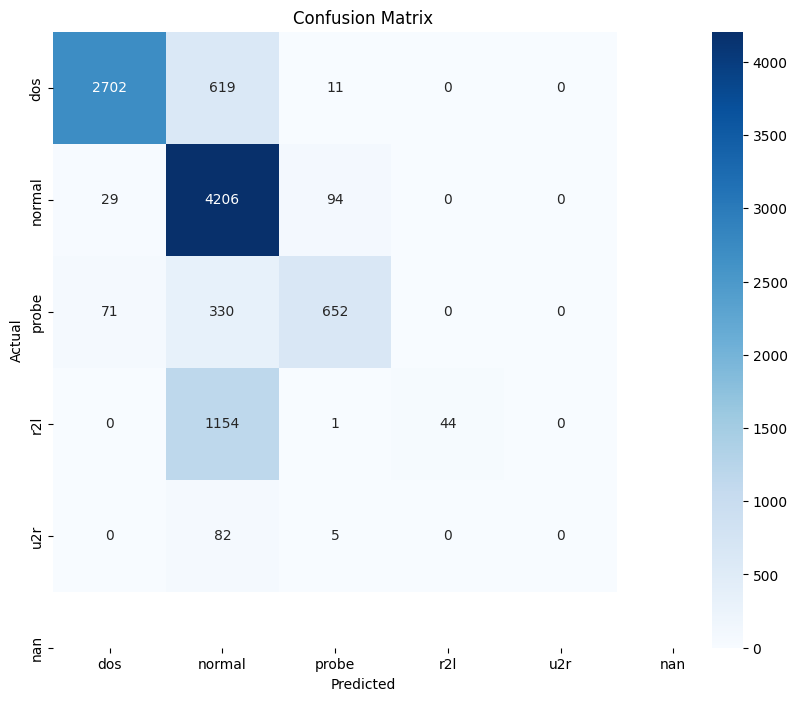

In [20]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Feature importance

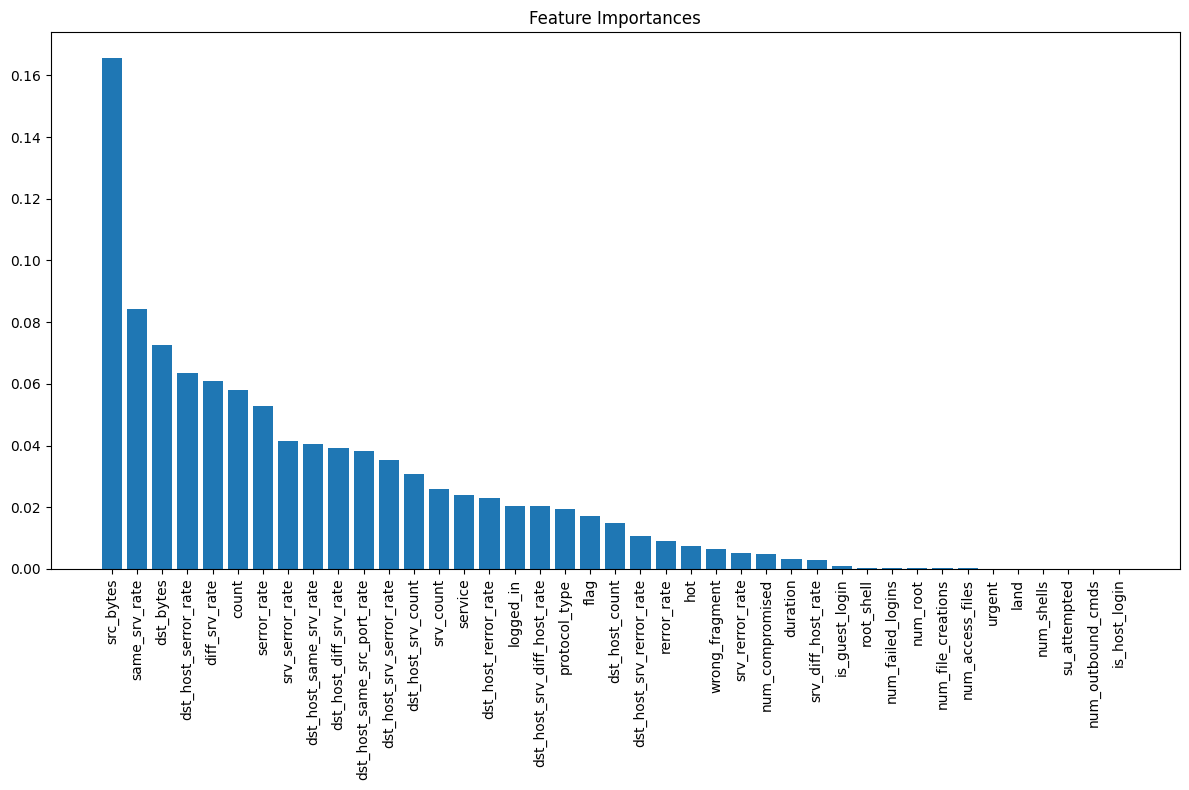

In [21]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()